# Define the pipeline config
This requires some knowledge about the dataset. It's important to note that we expect the dataset to have a train and test split. If it doesn't, you will have to adapt ´huqu.stages.dataset_loading.py´accordingly. 

## Example pipeline config
´´´
dataset:
  path: "Bingsu/Cat_and_Dog" # The path of the hugging face dataset
  config_name: "default"
  class_name: "dog"
  class_label: 1
  label_key: "labels" # Some datasets have different keys for the labels, like "label" or "labels"
  num_train_samples: 2
  num_test_samples: 2
  main_subject: "dogs" # The main theme or subject of the dataset
  captions_path: "data/captions_dogs.parquet" # Path to store the captions DataFrame
  assignments_path: "data/assignments_dogs.parquet" # Path to store the assignments DataFrame
  unrefined_criteria_path: "data/unrefined_criteria_dogs.json" # Path to store initial criteria
  refined_criteria_path: "data/refined_criteria_dogs.json" # Path to store refined criteria
  format: "parquet" # Format for stroing DataFrames
  compression: "snappy" # Compression method for parquet files

stages:
  criteria_init:
    batch_size: 2
  criteria_refinement:
    num_rounds: 1
    sample_size: 2
´´´

In [ ]:
from huqu.analyzer.complete_report import DataAnalyzer
import pandas as pd

# Load Datasets

In [2]:
parquet_file_test = "dogs_and_cats_test.parquet"
#parquet_file_test = "compost_and_metal_test.parquet"
#parquet_file_test = "fighting_and_laughing_test.parquet"

In [3]:
parquet_file_train = "dogs_and_cats_train.parquet"
#parquet_file_train = "compost_and_metal_train.parquet"
#parquet_file_train = "fighting_and_laughing_train.parquet"

## Combine dataset splits

In [4]:
df_train = pd.read_parquet(parquet_file_train)
df_test = pd.read_parquet(parquet_file_test)

In [5]:
df = {
    'train': df_train,
    'test': df_test
}

## Configure and Initialize the Analyzer


In [6]:
# Create optional custom configuration
# custom_config = {
#     'over_threshold': 0.6,       # Flag attributes appearing in more than X% of instances
#     'under_threshold': 0.05,     # Flag attributes appearing in less than X% of instances
#     'figure_size': (14, 8),      # Set larger figure size
#     'rare_threshold': 5          # Consider attributes appearing less than X times as rare
# }

In [7]:
# Initialize the analyzer with our data and custom config
analyzer = DataAnalyzer(df)

In [8]:
# Generate a comprehensive report including intraclass and interclass analysis
analyzer.complete_report()


INTRACLASS ANALYSIS (WITHIN-CLASS)
INTRACLASS ANALYSIS SUMMARY

------------------------------
DATA SPLITS DISTRIBUTION
------------------------------


,Total Images
train,200
test,100



------------------------------
CLASS DISTRIBUTION
------------------------------


,train,test
class,,
cat,100,50
dog,100,50



------------------------------
SUBPOPULATION SUMMARY
------------------------------
Class: cat
Total unique dimensions: 18
Total unique attributes: 86

Class: dog
Total unique dimensions: 7
Total unique attributes: 32


------------------------------
ATTRIBUTE DISTRIBUTION
------------------------------



------------------------------
 Outlier Analysis 
------------------------------
Number of 🚨 underrepresented attributes: train: 51, test: 40
Number of ⚠️ overrepresented attributes: train: 9, test: 8
Number of ❗ missing attributes: train: 1, test: 11


,class,dimension,attribute,train_flag,train_proportion,train_count,test_flag,test_proportion,test_count
0,cat,accessories,bed,,30.00%,30.0,,28.00%,14.0
1,cat,accessories,blanket,,40.00%,40.0,,34.00%,17.0
2,cat,accessories,collar,,17.00%,17.0,,20.00%,10.0
3,cat,accessories,scratching post,🚨 Underrepresented,3.00%,3.0,🚨 Underrepresented,6.00%,3.0
4,cat,accessories,toy,,10.00%,10.0,,12.00%,6.0
...,...,...,...,...,...,...,...,...,...
126,dog,position,surrounded,🚨 Underrepresented,9.00%,9.0,🚨 Underrepresented,8.00%,4.0
127,dog,size,large,🚨 Underrepresented,5.00%,5.0,🚨 Underrepresented,2.00%,1.0
128,dog,size,medium,⚠️ Overrepresented,64.00%,64.0,⚠️ Overrepresented,64.00%,32.0
129,dog,size,muscular,🚨 Underrepresented,8.00%,8.0,🚨 Underrepresented,4.00%,2.0



Tip: Use get_class_outliers() or get_dimension_outliers() for detailed analysis and plot_histogram() to visualize its output.

INTERCLASS ANALYSIS (BETWEEN-CLASS)
INTERCLASS ANALYSIS SUMMARY

------------------------------
Missing Attributes Analysis
------------------------------
Attributes present in some classes but missing in others:

Class: cat


dimension,missing in class,missing attribute,present in classes,occurrence rate (%)
accessories,cat,leash,dog,46.67
accessories,cat,bandana,dog,3.33
accessories,cat,tag,dog,0.67
position,cat,surrounded,dog,8.67
position,cat,lying down,dog,8.00
position,cat,resting,dog,6.00



Class: dog


dimension,missing in class,missing attribute,present in classes,occurrence rate (%)
accessories,dog,blanket,cat,38.00
accessories,dog,bed,cat,29.33
accessories,dog,scratching post,cat,4.00
position,dog,lying,cat,30.67
position,dog,held,cat,10.00
position,dog,behind,cat,3.33



------------------------------
Rare Attributes Analysis
------------------------------
Attributes appearing fewer than 3 times:


class,dimension,attribute,count_train,count_test,total_count
cat,age,senior,1,0,1
cat,behavior,Relaxed,1,0,1
cat,fur length,furless,1,0,1
cat,pattern,Multicolored,1,0,1
dog,accessories,tag,0,1,1
cat,context,warm lighting,2,0,2
cat,environment,wall,2,0,2
cat,expression,Calm,2,0,2
cat,mood,Calm,2,0,2
cat,texture,Smooth,1,1,2


## Focused Analysis: Intra-Class Distribution

The `detect_outliers()` function identifies any attributes that are overrepresented or underrepresented across classes

In [9]:
# Detect outliers in attribute distribution
outliers = analyzer.intra.detect_outliers()
display(outliers.head(10))

,class,dimension,attribute,train_flag,train_proportion,train_count,test_flag,test_proportion,test_count
0,cat,accessories,bed,,30.00%,30.0,,28.00%,14.0
1,cat,accessories,blanket,,40.00%,40.0,,34.00%,17.0
2,cat,accessories,collar,,17.00%,17.0,,20.00%,10.0
3,cat,accessories,scratching post,🚨 Underrepresented,3.00%,3.0,🚨 Underrepresented,6.00%,3.0
4,cat,accessories,toy,,10.00%,10.0,,12.00%,6.0
5,cat,activity,interacting,,20.00%,20.0,,20.00%,10.0
6,cat,activity,observing,,36.00%,36.0,,46.00%,23.0
7,cat,activity,playing,🚨 Underrepresented,4.00%,4.0,🚨 Underrepresented,4.00%,2.0
8,cat,activity,resting,,38.00%,38.0,,28.00%,14.0
9,cat,activity,sleeping,🚨 Underrepresented,2.00%,2.0,🚨 Underrepresented,2.00%,1.0


The `get_class_outliers()` function identifies any attributes that are overrepresented or underrepresented for a **specific class**. 

Adjust `over_threshold` and `under_threshold` if needed.

In [10]:
# Analyze a specific class
dog_outliers = analyzer.intra.get_class_outliers("dog")
display(dog_outliers.head(10))

,class,dimension,attribute,train_flag,train_proportion,train_count,test_flag,test_proportion,test_count
0,dog,accessories,bandana,🚨 Underrepresented,5.00%,5.0,❗ Missing,NaN,0.0
1,dog,accessories,collar,,37.00%,37.0,,36.00%,18.0
2,dog,accessories,leash,,45.00%,45.0,,50.00%,25.0
3,dog,accessories,tag,❗ Missing,NaN,0.0,🚨 Underrepresented,2.00%,1.0
4,dog,accessories,toy,,13.00%,13.0,,12.00%,6.0
5,dog,action,being alert,,30.00%,30.0,,28.00%,14.0
6,dog,action,engaging,,24.00%,24.0,,24.00%,12.0
7,dog,action,exploring,🚨 Underrepresented,7.00%,7.0,,14.00%,7.0
8,dog,action,playing,,22.00%,22.0,,16.00%,8.0
9,dog,action,resting,,17.00%,17.0,,18.00%,9.0


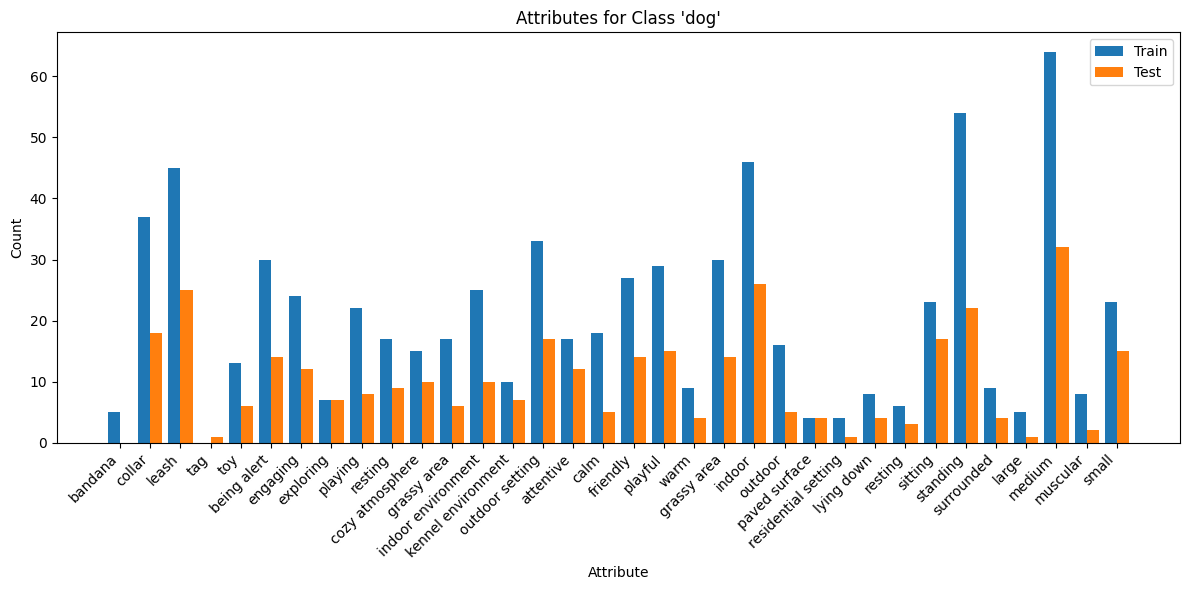

In [11]:
# Visualize the results
analyzer.intra.plot_histogram(dog_outliers)

The `get_dimension_outliers()` function identifies any attributes that are overrepresented or underrepresented for a **specific class-dimension pair**. 

Adjust `over_threshold` and `under_threshold` if needed.

In [12]:
# Analyze a specific dimension within a class
dog_size_outliers = analyzer.intra.get_dimension_outliers("dog", "size")
display(dog_size_outliers)

,class,dimension,attribute,train_flag,train_proportion,train_count,test_flag,test_proportion,test_count
0,dog,size,large,🚨 Underrepresented,5.00%,5.0,🚨 Underrepresented,2.00%,1.0
1,dog,size,medium,⚠️ Overrepresented,64.00%,64.0,⚠️ Overrepresented,64.00%,32.0
2,dog,size,muscular,🚨 Underrepresented,8.00%,8.0,🚨 Underrepresented,4.00%,2.0
3,dog,size,small,,23.00%,23.0,,30.00%,15.0


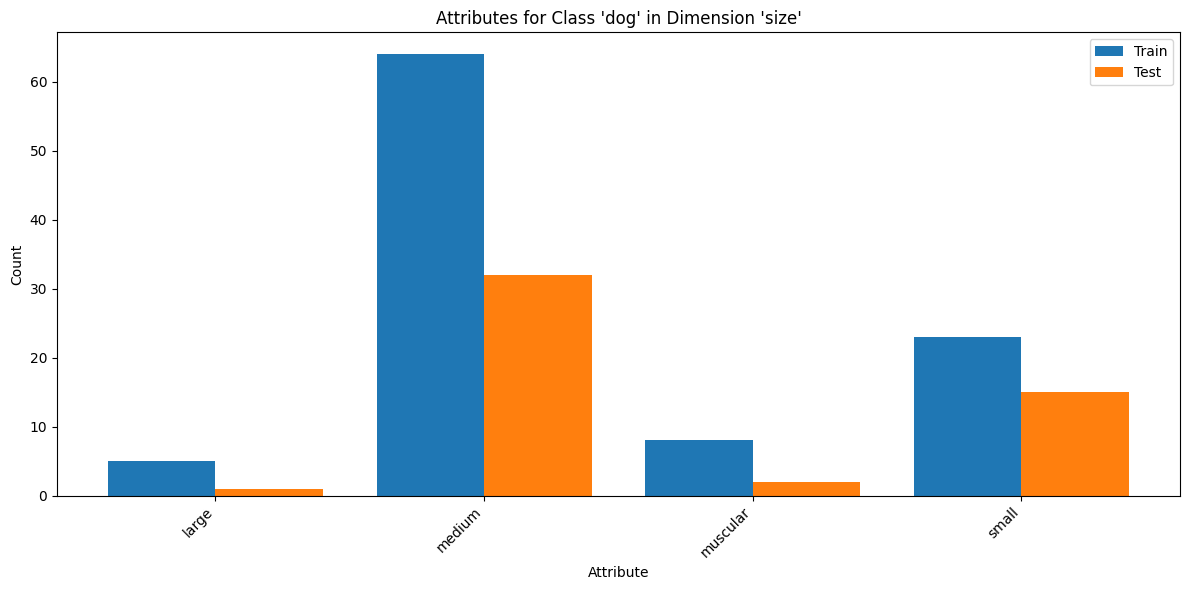

In [13]:
# Visualize the results
analyzer.intra.plot_histogram(dog_size_outliers)

## Focused Analysis: Inter-Class Distribution

In [14]:
# Analyze rare attributes
rare_attrs = analyzer.inter.analyze_rare_attributes(threshold=4)
display(rare_attrs)

,class,dimension,attribute,count_train,count_test,total_count
0,cat,age,senior,1,0,1
1,cat,behavior,Relaxed,1,0,1
2,cat,fur length,furless,1,0,1
3,cat,pattern,Multicolored,1,0,1
4,dog,accessories,tag,0,1,1
5,cat,context,warm lighting,2,0,2
6,cat,environment,wall,2,0,2
7,cat,expression,Calm,2,0,2
8,cat,mood,Calm,2,0,2
9,cat,texture,Smooth,1,1,2


In [15]:
# Compare attributes across classes
missing_attrs = analyzer.inter.compare_class_attributes()
display(missing_attrs.head(10))

,dimension,missing in class,missing attribute,present in classes,occurrence rate (%)
0,accessories,cat,leash,dog,46.67
1,accessories,dog,blanket,cat,38.00
2,accessories,dog,bed,cat,29.33
3,accessories,dog,scratching post,cat,4.00
4,accessories,cat,bandana,dog,3.33
5,accessories,cat,tag,dog,0.67
6,position,dog,lying,cat,30.67
7,position,dog,held,cat,10.00
8,position,cat,surrounded,dog,8.67
9,position,cat,lying down,dog,8.00


In [16]:
# Analyze attributes missing in a specific class
dog_missing = analyzer.inter.get_unique_to_class("dog")
display(dog_missing)

,dimension,missing in class,missing attribute,present in classes,occurrence rate (%)
1,accessories,dog,blanket,cat,38.00
2,accessories,dog,bed,cat,29.33
3,accessories,dog,scratching post,cat,4.00
6,position,dog,lying,cat,30.67
7,position,dog,held,cat,10.00
11,position,dog,behind,cat,3.33
